[[0.]
 [0.]
 [0.]
 [0.]]
[[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[1.0010001e+03 9.9999980e-05 1.0000000e+03 0.0000000e+00]
 [9.9999980e-05 1.0010001e+03 0.0000000e+00 1.0000000e+03]
 [1.0000000e+03 0.0000000e+00 1.0010000e+03 0.0000000e+00]
 [0.0000000e+00 1.0000000e+03 0.0000000e+00 1.0010000e+03]]
[[1.06336499]
 [0.55735816]
 [0.53141675]
 [0.27853977]]
[[2.99950040e+00 4.99400599e-04 1.99930050e+00 2.99500559e-04]
 [4.99400599e-04 2.99950040e+00 2.99500559e-04 1.99930050e+00]
 [1.99930050e+00 2.99500559e-04 2.99920060e+00 1.99600499e-04]
 [2.99500559e-04 1.99930050e+00 1.99600499e-04 2.99920060e+00]]
[[1.65171555]
 [1.78298732]
 [0.55418397]
 [0.65733364]]
[[2.66685556e+00 2.99928917e-04 1.66668892e+00 1.33286688e-04]
 [2.99928917e-04 2.66685556e+00 1.33286688e-04 1.66668892e+00]
 [1.66668892e+00 1.33286688e-04 2.66662227e+00 6.66377938e-05]
 [1.33286688e-04 1.66668892e+00 6.66377938e-05 2

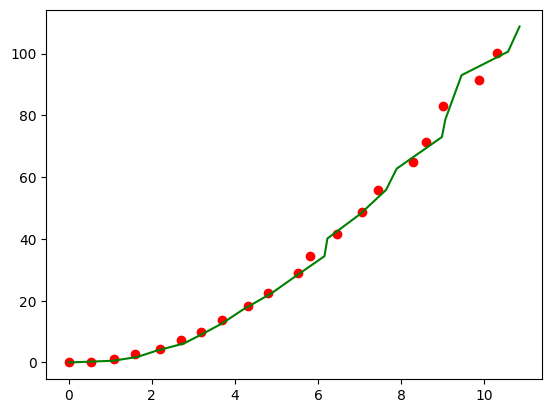

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P

def demo_kalman_xy():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    N = 20
    true_x = np.linspace(0.0, 10.0, N)
    true_y = true_x**2
    observed_x = true_x + 0.05*np.random.random(N)*true_x
    observed_y = true_y + 0.05*np.random.random(N)*true_y
    plt.plot(observed_x, observed_y, 'ro')
    result = []
    R = 0.01**2
    # print(observed_x)
    # print(observed_y)

    for meas in zip(observed_x, observed_y):
        # print(meas)
        print(x)
        print("====================================")
        print(P)
        x, P = kalman_xy(x, P, meas, R)
       
        result.append((x[:2]).tolist())
    # print(result)
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.show()

demo_kalman_xy()

In [64]:
import numpy as np

# Define the state transition matrix
dt = 1.0  # Time step
F = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

# Define the control input matrix
B = np.array([[dt**2/2, 0], [0, dt**2/2], [dt, 0], [0, dt]])

# Define the measurement matrix
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

# Define the process and measurement noise covariance matrices
Q = np.eye(4) * 0.01  # Process noise
R = np.eye(2) * 0.1  # Measurement noise

# Initialize the state estimate and error covariance matrices
x = np.zeros((4, 1))  # Initial state estimate
P = np.eye(4) * 1000  # Initial error covariance

def kalman_filter(x, P, z):
    # Predict the next state and error covariance
    x = F @ x + B @ u
    P = F @ P @ F.T + Q
    
    # Calculate the Kalman gain
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    
    # Update the state estimate and error covariance
    x = x + K @ (z - H @ x)
    P = (np.eye(4) - K @ H) @ P
    
    return x, P

# Example usage
u = np.array([[0], [0]])  # No control input
z = np.array([[1], [1]])  # Example measurement

# Apply the Kalman filter to the measurement
x, P = kalman_filter(x, P, z)

# Print the updated state estimate
print(x)


[[0.99995  ]
 [0.99995  ]
 [0.4999725]
 [0.4999725]]
